In [1]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()

/home/clementpoiret/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [3]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

In [4]:
vote_counts = {}
def majority_vote(votes):
       
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1

    winners = []
    max_counts = max(vote_counts.values())

    for vote, count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
    
    return random.choice(winners)

In [5]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3,2,2]
winner = majority_vote(votes)

In [6]:
winner

3

In [7]:
def majority_vote_short(votes):
    mode, count = ss.mstats.mode(votes)
    
    return mode

In [8]:
votes = [1,2,3,1,2,3,3,3,3]
winner = majority_vote_short(votes)
winner

array([3.])

In [9]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])

In [10]:
p = np.array([2.5, 2])

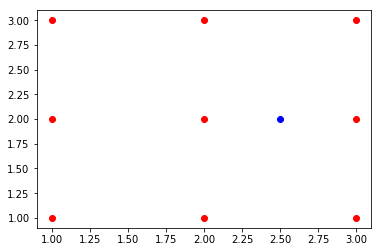

In [11]:
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")

In [12]:
def find_nearest_neighbors(p, points, k=5):
    """
    Find the k nearest neighbors of point p and return their indices.
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

In [13]:
ind = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [14]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [15]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [16]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [17]:
def generate_synth_data(n=50):
    """def plot_prediction_grid (xx, yy, prediction_grid, filename)
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

In [18]:
n = 20
(points, outcomes) = generate_synth_data(n)

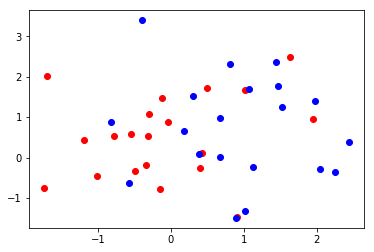

In [19]:
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivariatedata.pdf")

In [20]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)

In [21]:
# function taken from HarvardX course
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [22]:
(predictors, outcomes) = generate_synth_data()

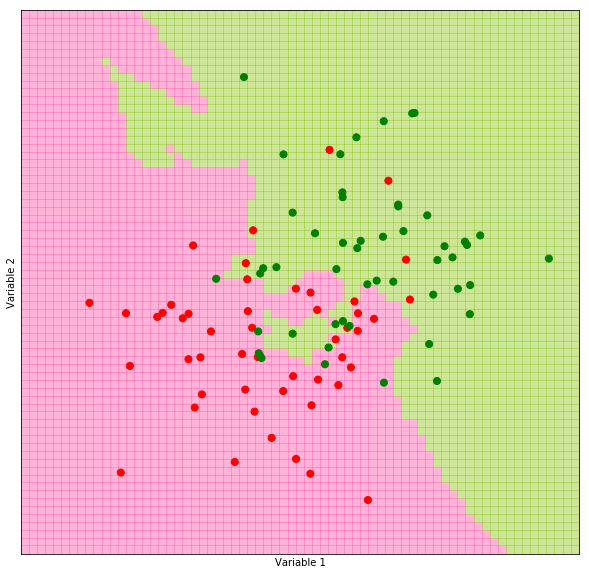

In [23]:
k = 5; filename='knn_synth_5.pdf'; limits = (-3,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [24]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

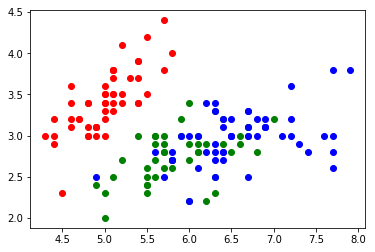

In [26]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

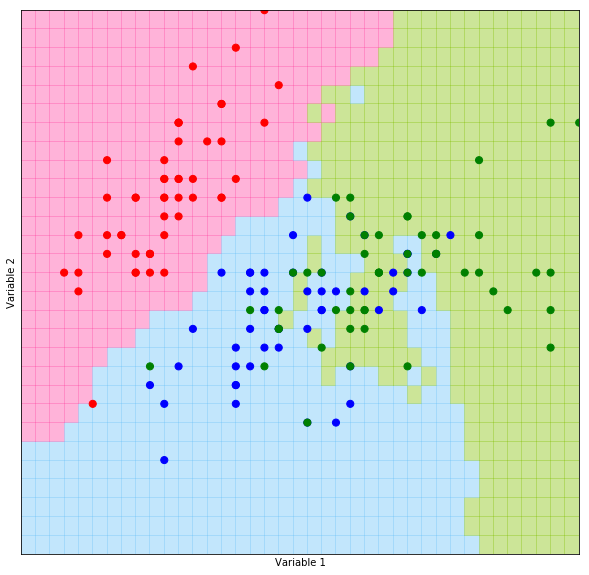

In [27]:
k=5; filename="iris_grid.pdf"; limits = (4,8,1.5,4.5); h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [29]:
sk_predictions.shape

(150,)

In [30]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

(150,)

In [31]:
print(np.mean(sk_predictions == my_predictions))
print(np.mean(sk_predictions == outcomes))
print(np.mean(my_predictions == outcomes))

0.96
0.8333333333333334
0.8466666666666667
